C:\Users\User\AppData\Local\Temp\ipykernel_10512\879418551.py:8: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=17, parse_dates=[[0, 1]])


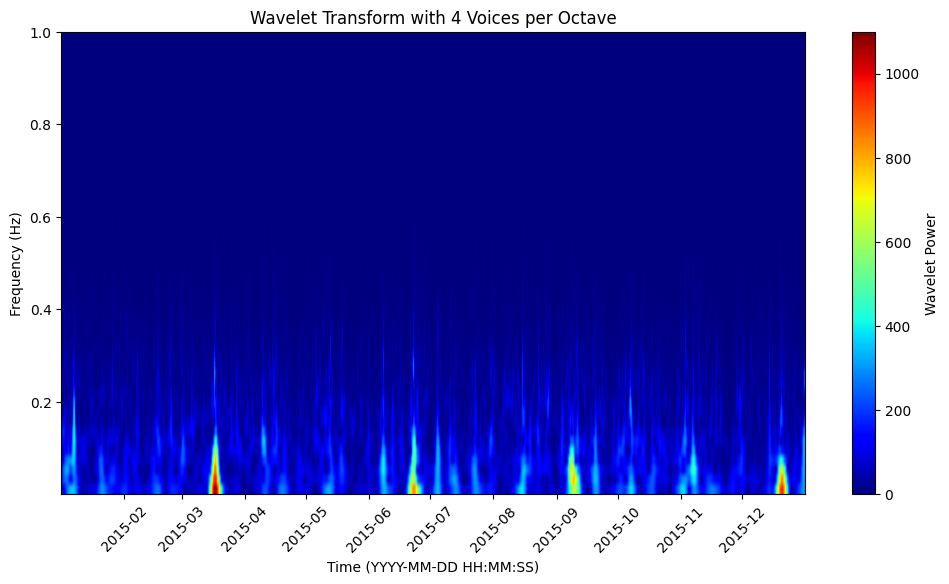

In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd

# Load the geomagnetic data file
file_path = "KyotoSymhYear2015.dat"
data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=17, parse_dates=[[0, 1]])

# Rename columns for clarity
data.columns = ["Timestamp", "DOY", "ASY-D", "ASY-H", "SYM-D", "SYM-H"]

# Extract timestamps and geomagnetic data
timestamps = data["Timestamp"].values  # Extracted timestamps
geomagnetic_index = data["SYM-H"].values  # Geomagnetic index data

# Define wavelet parameters
wavelet = 'cmor1.5-1.0'  # Morlet wavelet with bandwidth=1.5, center frequency=1.0
min_scale = 1  # Smallest scale (highest frequency)
num_voices_per_octave = 4  # More voices = finer frequency resolution
num_octaves = 12  # Total number of octaves analyzed

# Compute scales: Logarithmic spacing with octave subdivision
scales = min_scale * 2 ** (np.arange(num_octaves * num_voices_per_octave) / num_voices_per_octave)

# Compute the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(geomagnetic_index, scales, wavelet, 1)

# Plot the wavelet spectrum with timestamps as the x-axis
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), aspect='auto', extent=[timestamps[0], timestamps[-1], frequencies[-1], frequencies[0]], cmap='jet')

plt.colorbar(label="Wavelet Power")
plt.xlabel("Time (YYYY-MM-DD HH:MM:SS)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Wavelet Transform with {num_voices_per_octave} Voices per Octave")
plt.xticks(rotation=45)  # Rotate timestamps for better readability
plt.show()


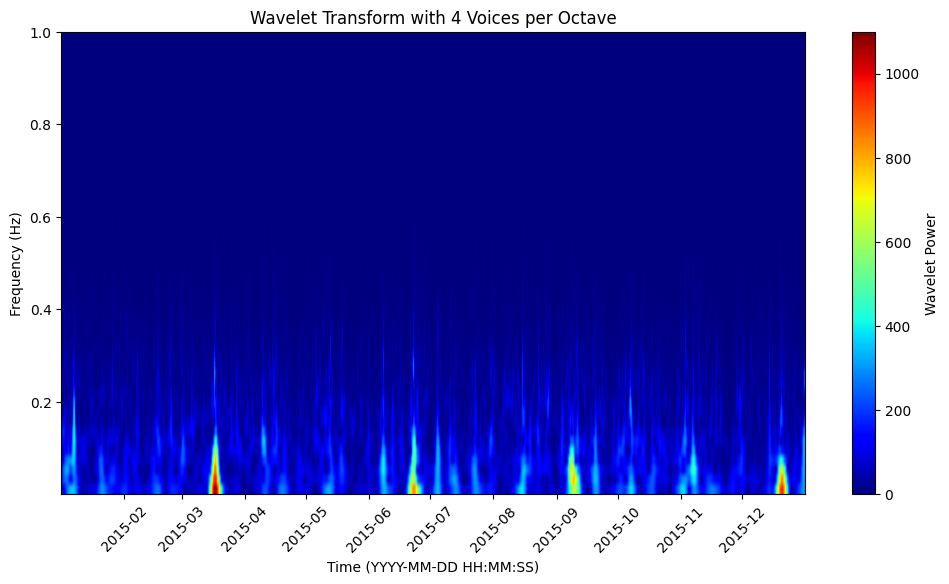

In [2]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd

# Load the geomagnetic data file
file_path = "KyotoSymhYear2015.dat"
data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=17)

# Rename columns for clarity
data.columns = ["Date", "Time", "DOY", "ASY-D", "ASY-H", "SYM-D", "SYM-H"]

# Combine "Date" and "Time" columns into a single datetime column
data["Timestamp"] = pd.to_datetime(data["Date"] + " " + data["Time"])

# Extract timestamps and geomagnetic index
timestamps = data["Timestamp"].values  # Extracted timestamps
geomagnetic_index = data["SYM-H"].values  # Geomagnetic index data

# Define wavelet parameters
wavelet = 'cmor1.5-1.0'  # Morlet wavelet with bandwidth=1.5, center frequency=1.0
min_scale = 1  # Smallest scale (highest frequency)
num_voices_per_octave = 4  # More voices = finer frequency resolution
num_octaves = 12  # Total number of octaves analyzed

# Compute scales: Logarithmic spacing with octave subdivision
scales = min_scale * 2 ** (np.arange(num_octaves * num_voices_per_octave) / num_voices_per_octave)

# Compute the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(geomagnetic_index, scales, wavelet, 1)

# Plot the wavelet spectrum with timestamps as the x-axis
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), aspect='auto', extent=[timestamps[0], timestamps[-1], frequencies[-1], frequencies[0]], cmap='jet')

plt.colorbar(label="Wavelet Power")
plt.xlabel("Time (YYYY-MM-DD HH:MM:SS)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Wavelet Transform with {num_voices_per_octave} Voices per Octave")
plt.xticks(rotation=45)  # Rotate timestamps for better readability
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_10512\4147064071.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.xticks(pd.date_range(start=timestamps[0], end=timestamps[-1], freq='2M'), rotation=45)


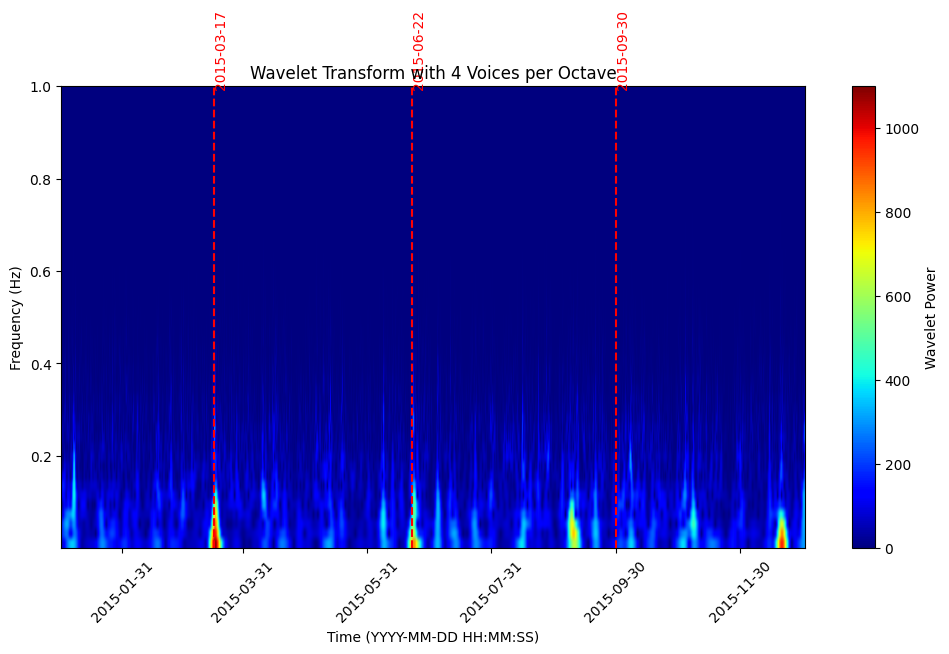

In [3]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd

# Load the geomagnetic data file
file_path = "KyotoSymhYear2015.dat"
data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=17)

# Rename columns for clarity
data.columns = ["Date", "Time", "DOY", "ASY-D", "ASY-H", "SYM-D", "SYM-H"]

# Combine "Date" and "Time" columns into a single datetime column
data["Timestamp"] = pd.to_datetime(data["Date"] + " " + data["Time"])

# Extract timestamps and geomagnetic index
timestamps = data["Timestamp"].values  # Extracted timestamps
geomagnetic_index = data["SYM-H"].values  # Geomagnetic index data

# Define wavelet parameters
wavelet = 'cmor1.5-1.0'  # Morlet wavelet with bandwidth=1.5, center frequency=1.0
min_scale = 1  # Smallest scale (highest frequency)
num_voices_per_octave = 4  # More voices = finer frequency resolution
num_octaves = 12  # Total number of octaves analyzed

# Compute scales: Logarithmic spacing with octave subdivision
scales = min_scale * 2 ** (np.arange(num_octaves * num_voices_per_octave) / num_voices_per_octave)

# Compute the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(geomagnetic_index, scales, wavelet, 1)

# Plot the wavelet spectrum with timestamps as the x-axis
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), aspect='auto', extent=[timestamps[0], timestamps[-1], frequencies[-1], frequencies[0]], cmap='jet')

plt.colorbar(label="Wavelet Power")
plt.xlabel("Time (YYYY-MM-DD HH:MM:SS)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Wavelet Transform with {num_voices_per_octave} Voices per Octave")

# ✅ Automatically select a few months to display
plt.xticks(pd.date_range(start=timestamps[0], end=timestamps[-1], freq='2M'), rotation=45)

# ✅ Manually highlight specific dates
important_dates = ["2015-03-17", "2015-06-22", "2015-09-30"]  # Replace with your dates
important_dates = pd.to_datetime(important_dates)

for date in important_dates:
    plt.axvline(date, color='r', linestyle='--', linewidth=1.5)  # Add vertical lines for key dates
    plt.text(date, frequencies[0], date.strftime("%Y-%m-%d"), color='r', fontsize=10, rotation=90)

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_10512\2538922605.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  default_ticks = pd.date_range(start=timestamps[0], end=timestamps[-1], freq='2M')


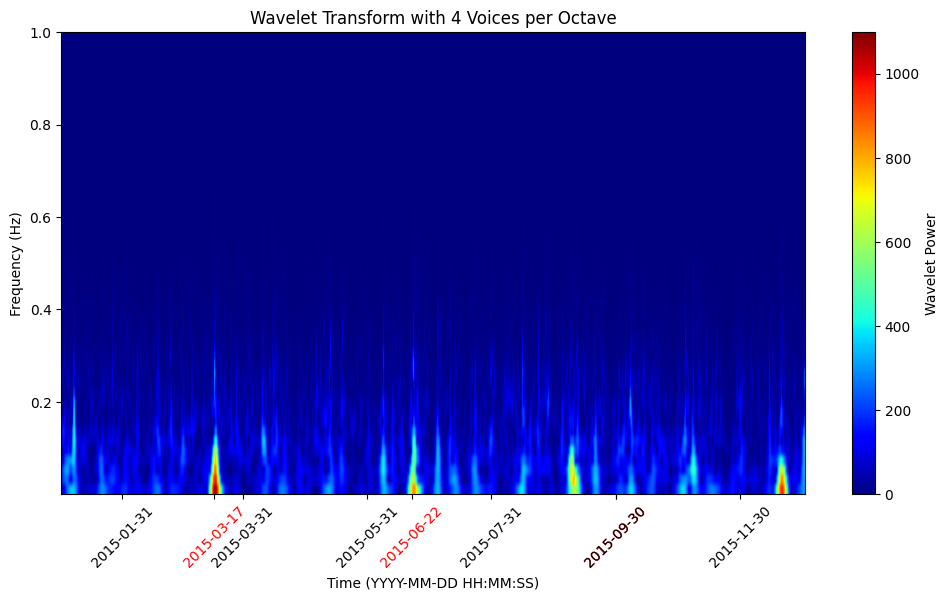

In [4]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd

# Load the geomagnetic data file
file_path = "KyotoSymhYear2015.dat"
data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=17)

# Rename columns for clarity
data.columns = ["Date", "Time", "DOY", "ASY-D", "ASY-H", "SYM-D", "SYM-H"]

# Combine "Date" and "Time" columns into a single datetime column
data["Timestamp"] = pd.to_datetime(data["Date"] + " " + data["Time"])

# Extract timestamps and geomagnetic index
timestamps = data["Timestamp"].values  # Extracted timestamps
geomagnetic_index = data["SYM-H"].values  # Geomagnetic index data

# Define wavelet parameters
wavelet = 'cmor1.5-1.0'  # Morlet wavelet with bandwidth=1.5, center frequency=1.0
min_scale = 1  # Smallest scale (highest frequency)
num_voices_per_octave = 4  # More voices = finer frequency resolution
num_octaves = 12  # Total number of octaves analyzed

# Compute scales: Logarithmic spacing with octave subdivision
scales = min_scale * 2 ** (np.arange(num_octaves * num_voices_per_octave) / num_voices_per_octave)

# Compute the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(geomagnetic_index, scales, wavelet, 1)

# Plot the wavelet spectrum with timestamps on x-axis
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), aspect='auto', extent=[timestamps[0], timestamps[-1], frequencies[-1], frequencies[0]], cmap='jet')

plt.colorbar(label="Wavelet Power")
plt.xlabel("Time (YYYY-MM-DD HH:MM:SS)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Wavelet Transform with {num_voices_per_octave} Voices per Octave")

# ✅ Automatically generate x-axis ticks every 2 months
default_ticks = pd.date_range(start=timestamps[0], end=timestamps[-1], freq='2M')

# ✅ Manually highlight storm dates in red
storm_dates = ["2015-03-17", "2015-06-22", "2015-09-30"]  # Add more if needed
storm_dates = pd.to_datetime(storm_dates)

# Merge default ticks with storm dates, keeping unique values
all_ticks = sorted(set(default_ticks).union(set(storm_dates)))

# ✅ Change color for storm dates on x-axis
tick_colors = ["red" if date in storm_dates else "black" for date in all_ticks]

# ✅ Apply x-axis labels with colors
plt.xticks(all_ticks, [date.strftime("%Y-%m-%d") for date in all_ticks], rotation=45)
for ticklabel, color in zip(plt.gca().get_xticklabels(), tick_colors):
    ticklabel.set_color(color)

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_10512\1169817480.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  default_ticks = pd.date_range(start=timestamps[0], end=timestamps[-1], freq='2M')


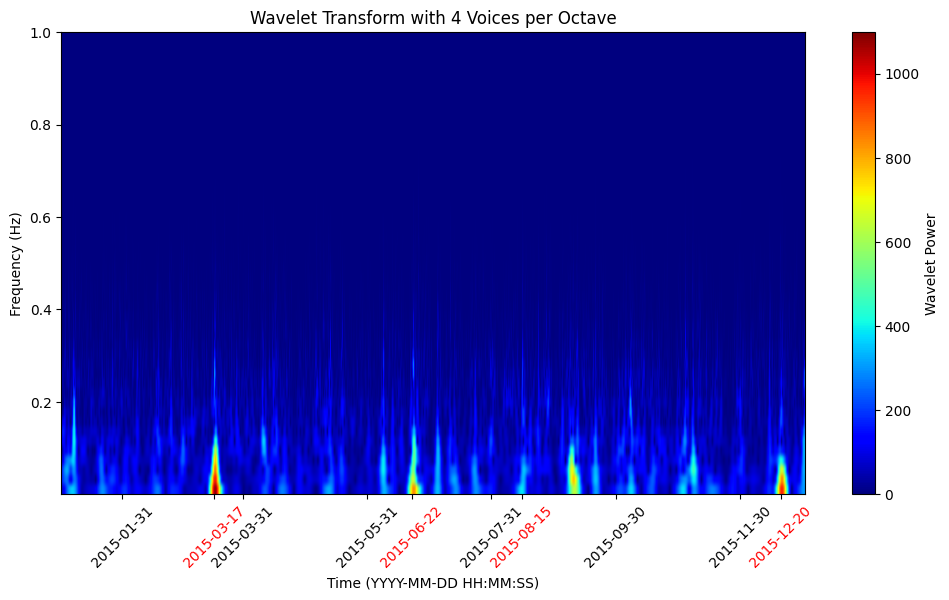

In [6]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd

# Load the geomagnetic data file
file_path = "KyotoSymhYear2015.dat"
data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=17)

# Rename columns for clarity
data.columns = ["Date", "Time", "DOY", "ASY-D", "ASY-H", "SYM-D", "SYM-H"]

# Combine "Date" and "Time" columns into a single datetime column
data["Timestamp"] = pd.to_datetime(data["Date"] + " " + data["Time"])

# Extract timestamps and geomagnetic index
timestamps = data["Timestamp"].values  # Extracted timestamps
geomagnetic_index = data["SYM-H"].values  # Geomagnetic index data

# Define wavelet parameters
wavelet = 'cmor1.5-1.0'  # Morlet wavelet with bandwidth=1.5, center frequency=1.0
min_scale = 1  # Smallest scale (highest frequency)
num_voices_per_octave = 4  # More voices = finer frequency resolution
num_octaves = 12  # Total number of octaves analyzed

# Compute scales: Logarithmic spacing with octave subdivision
scales = min_scale * 2 ** (np.arange(num_octaves * num_voices_per_octave) / num_voices_per_octave)

# Compute the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(geomagnetic_index, scales, wavelet, 1)

# Plot the wavelet spectrum with timestamps on x-axis
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), aspect='auto', extent=[timestamps[0], timestamps[-1], frequencies[-1], frequencies[0]], cmap='jet')

plt.colorbar(label="Wavelet Power")
plt.xlabel("Time (YYYY-MM-DD HH:MM:SS)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Wavelet Transform with {num_voices_per_octave} Voices per Octave")

# ✅ Automatically generate x-axis ticks every 2 months
default_ticks = pd.date_range(start=timestamps[0], end=timestamps[-1], freq='2M')

# ✅ Manually highlight storm dates in red

storm_dates = ["2015-03-17", "2015-06-22", "2015-08-15", "2015-12-20"]  # Updated storm dates
storm_dates = pd.to_datetime(storm_dates)

# Merge default ticks with storm dates, keeping unique values
all_ticks = sorted(set(default_ticks).union(set(storm_dates)))

# ✅ Change color for storm dates on x-axis
tick_colors = ["red" if date in storm_dates else "black" for date in all_ticks]

# ✅ Apply x-axis labels with colors
plt.xticks(all_ticks, [date.strftime("%Y-%m-%d") for date in all_ticks], rotation=45)
for ticklabel, color in zip(plt.gca().get_xticklabels(), tick_colors):
    ticklabel.set_color(color)

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_10512\1169817480.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  default_ticks = pd.date_range(start=timestamps[0], end=timestamps[-1], freq='2M')


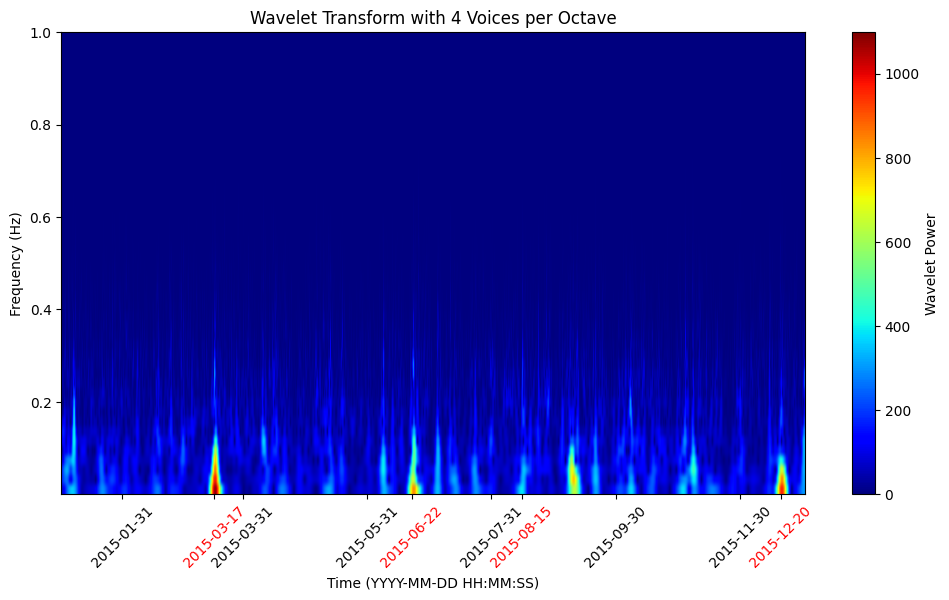

In [6]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd

# Load the geomagnetic data file
file_path = "KyotoSymhYear2015.dat"
data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=17)

# Rename columns for clarity
data.columns = ["Date", "Time", "DOY", "ASY-D", "ASY-H", "SYM-D", "SYM-H"]

# Combine "Date" and "Time" columns into a single datetime column
data["Timestamp"] = pd.to_datetime(data["Date"] + " " + data["Time"])

# Extract timestamps and geomagnetic index
timestamps = data["Timestamp"].values  # Extracted timestamps
geomagnetic_index = data["SYM-H"].values  # Geomagnetic index data

# Define wavelet parameters
wavelet = 'cmor1.5-1.0'  # Morlet wavelet with bandwidth=1.5, center frequency=1.0
min_scale = 1  # Smallest scale (highest frequency)
num_voices_per_octave = 4  # More voices = finer frequency resolution
num_octaves = 12  # Total number of octaves analyzed

# Compute scales: Logarithmic spacing with octave subdivision
scales = min_scale * 2 ** (np.arange(num_octaves * num_voices_per_octave) / num_voices_per_octave)

# Compute the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(geomagnetic_index, scales, wavelet, 1)

# Plot the wavelet spectrum with timestamps on x-axis
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), aspect='auto', extent=[timestamps[0], timestamps[-1], frequencies[-1], frequencies[0]], cmap='jet')

plt.colorbar(label="Wavelet Power")
plt.xlabel("Time (YYYY-MM-DD HH:MM:SS)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Wavelet Transform with {num_voices_per_octave} Voices per Octave")

# ✅ Automatically generate x-axis ticks every 2 months
default_ticks = pd.date_range(start=timestamps[0], end=timestamps[-1], freq='2M')

# ✅ Manually highlight storm dates in red

storm_dates = ["2015-03-17", "2015-06-22", "2015-08-15", "2015-12-20"]  # Updated storm dates
storm_dates = pd.to_datetime(storm_dates)

# Merge default ticks with storm dates, keeping unique values
all_ticks = sorted(set(default_ticks).union(set(storm_dates)))

# ✅ Change color for storm dates on x-axis
tick_colors = ["red" if date in storm_dates else "black" for date in all_ticks]

# ✅ Apply x-axis labels with colors
plt.xticks(all_ticks, [date.strftime("%Y-%m-%d") for date in all_ticks], rotation=45)
for ticklabel, color in zip(plt.gca().get_xticklabels(), tick_colors):
    ticklabel.set_color(color)

plt.show()


In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd

# Load the geomagnetic data file
file_path = "KyotoSymhYear2015.dat"
data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=17)

# Rename columns for clarity
data.columns = ["Date", "Time", "DOY", "ASY-D", "ASY-H", "SYM-D", "SYM-H"]

# Combine "Date" and "Time" columns into a single datetime column
data["Timestamp"] = pd.to_datetime(data["Date"] + " " + data["Time"])

# Extract timestamps and geomagnetic index
timestamps = data["Timestamp"].values  # Extracted timestamps
geomagnetic_index = data["SYM-H"].values  # Geomagnetic index data

# Define wavelet parameters
wavelet = 'cmor1.5-1.0'  # Morlet wavelet with bandwidth=1.5, center frequency=1.0
min_scale = 1  # Smallest scale (highest frequency)
num_voices_per_octave = 4  # More voices = finer frequency resolution
num_octaves = 12  # Total number of octaves analyzed

# Compute scales: Logarithmic spacing with octave subdivision
scales = min_scale * 2 ** (np.arange(num_octaves * num_voices_per_octave) / num_voices_per_octave)

# Compute the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(geomagnetic_index, scales, wavelet, 1)

# Plot the wavelet spectrum with timestamps on x-axis
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), aspect='auto', extent=[timestamps[0], timestamps[-1], frequencies[-1], frequencies[0]], cmap='jet')

plt.colorbar(label="Wavelet Power")
plt.xlabel("Time (YYYY-MM-DD HH:MM:SS)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Wavelet Transform with {num_voices_per_octave} Voices per Octave")

# ✅ Automatically generate x-axis ticks every 2 months
default_ticks = pd.date_range(start=timestamps[0], end=timestamps[-1], freq='2ME')

# ✅ Manually highlight storm dates in red

storm_dates = ["2015-03-17", "2015-06-22", "2015-08-15", "2015-12-20"]  # Updated storm dates
storm_dates = pd.to_datetime(storm_dates)

# Merge default ticks with storm dates, keeping unique values
all_ticks = sorted(set(default_ticks).union(set(storm_dates)))

# ✅ Change color for storm dates on x-axis
tick_colors = ["red" if date in storm_dates else "black" for date in all_ticks]

# ✅ Apply x-axis labels with colors
plt.xticks(all_ticks, [date.strftime("%Y-%m-%d") for date in all_ticks], rotation=45)
for ticklabel, color in zip(plt.gca().get_xticklabels(), tick_colors):
    ticklabel.set_color(color)

plt.show()


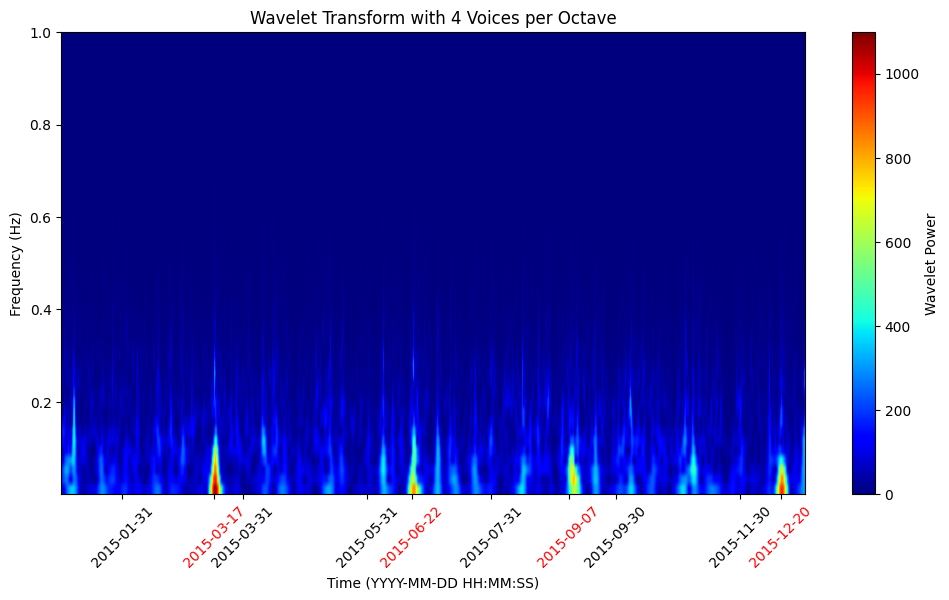

In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd

# Load the geomagnetic data file
file_path = "KyotoSymhYear2015.dat"
data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=17)

# Rename columns for clarity
data.columns = ["Date", "Time", "DOY", "ASY-D", "ASY-H", "SYM-D", "SYM-H"]

# Combine "Date" and "Time" columns into a single datetime column
data["Timestamp"] = pd.to_datetime(data["Date"] + " " + data["Time"])

# Extract timestamps and geomagnetic index
timestamps = data["Timestamp"].values  # Extracted timestamps
geomagnetic_index = data["SYM-H"].values  # Geomagnetic index data

# Define wavelet parameters
wavelet = 'cmor1.5-1.0'  # Morlet wavelet with bandwidth=1.5, center frequency=1.0
min_scale = 1  # Smallest scale (highest frequency)
num_voices_per_octave = 4  # More voices = finer frequency resolution
num_octaves = 12  # Total number of octaves analyzed

# Compute scales: Logarithmic spacing with octave subdivision
scales = min_scale * 2 ** (np.arange(num_octaves * num_voices_per_octave) / num_voices_per_octave)

# Compute the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(geomagnetic_index, scales, wavelet, 1)

# Plot the wavelet spectrum with timestamps on x-axis
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), aspect='auto', extent=[timestamps[0], timestamps[-1], frequencies[-1], frequencies[0]], cmap='jet')

plt.colorbar(label="Wavelet Power")
plt.xlabel("Time (YYYY-MM-DD HH:MM:SS)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Wavelet Transform with {num_voices_per_octave} Voices per Octave")

# ✅ Automatically generate x-axis ticks every 2 months
default_ticks = pd.date_range(start=timestamps[0], end=timestamps[-1], freq='2ME')

# ✅ Manually highlight storm dates in red

storm_dates = ["2015-03-17", "2015-06-22", "2015-09-07", "2015-12-20"]  # Updated storm dates
storm_dates = pd.to_datetime(storm_dates)

# Merge default ticks with storm dates, keeping unique values
all_ticks = sorted(set(default_ticks).union(set(storm_dates)))

# ✅ Change color for storm dates on x-axis
tick_colors = ["red" if date in storm_dates else "black" for date in all_ticks]

# ✅ Apply x-axis labels with colors
plt.xticks(all_ticks, [date.strftime("%Y-%m-%d") for date in all_ticks], rotation=45)
for ticklabel, color in zip(plt.gca().get_xticklabels(), tick_colors):
    ticklabel.set_color(color)

plt.show()

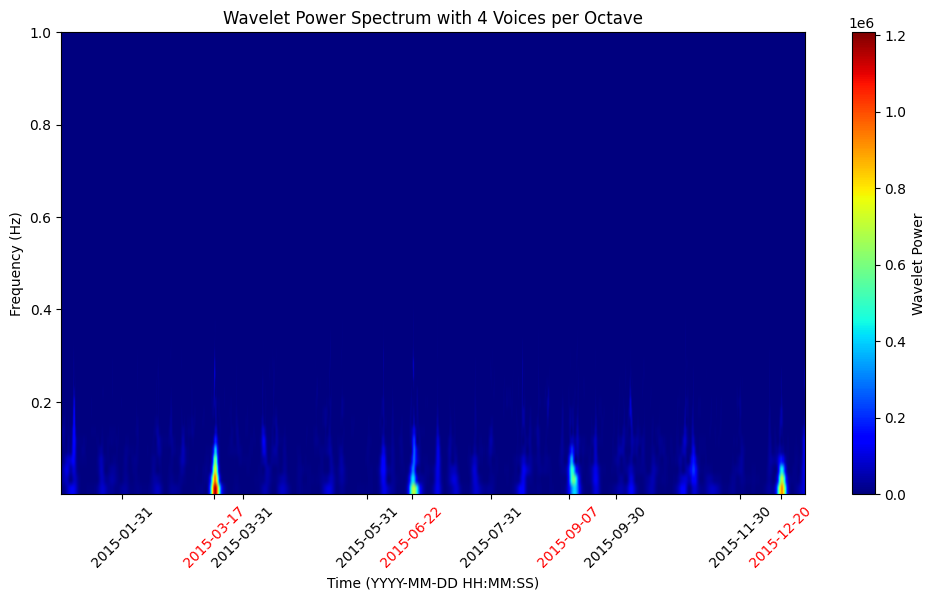

In [2]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd

# Load the geomagnetic data file
file_path = "KyotoSymhYear2015.dat"
data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=17)

# Rename columns for clarity
data.columns = ["Date", "Time", "DOY", "ASY-D", "ASY-H", "SYM-D", "SYM-H"]

# Combine "Date" and "Time" columns into a single datetime column
data["Timestamp"] = pd.to_datetime(data["Date"] + " " + data["Time"])

# Extract timestamps and geomagnetic index
timestamps = data["Timestamp"].values  # Extracted timestamps
geomagnetic_index = data["SYM-H"].values  # Geomagnetic index data

# Define wavelet parameters
wavelet = 'cmor1.5-1.0'  # Morlet wavelet with bandwidth=1.5, center frequency=1.0
min_scale = 1  # Smallest scale (highest frequency)
num_voices_per_octave = 4  # More voices = finer frequency resolution
num_octaves = 12  # Total number of octaves analyzed

# Compute scales: Logarithmic spacing with octave subdivision
scales = min_scale * 2 ** (np.arange(num_octaves * num_voices_per_octave) / num_voices_per_octave)

# Compute the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(geomagnetic_index, scales, wavelet, 1)

# ✅ Compute the power spectrum (square of absolute values)
power_spectrum = np.abs(coefficients) ** 2

# ✅ Plot the Wavelet Power Spectrum with timestamps on the x-axis
plt.figure(figsize=(12, 6))
plt.imshow(power_spectrum, aspect='auto', extent=[timestamps[0], timestamps[-1], frequencies[-1], frequencies[0]], cmap='jet')

plt.colorbar(label="Wavelet Power")
plt.xlabel("Time (YYYY-MM-DD HH:MM:SS)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Wavelet Power Spectrum with {num_voices_per_octave} Voices per Octave")

# ✅ Automatically generate x-axis ticks every 2 months
default_ticks = pd.date_range(start=timestamps[0], end=timestamps[-1], freq='2ME')

# ✅ Manually highlight storm dates in red
storm_dates = ["2015-03-17", "2015-06-22", "2015-09-07", "2015-12-20"]  # Updated storm dates
storm_dates = pd.to_datetime(storm_dates)

# Merge default ticks with storm dates, keeping unique values
all_ticks = sorted(set(default_ticks).union(set(storm_dates)))

# ✅ Change color for storm dates on x-axis
tick_colors = ["red" if date in storm_dates else "black" for date in all_ticks]

# ✅ Apply x-axis labels with colors
plt.xticks(all_ticks, [date.strftime("%Y-%m-%d") for date in all_ticks], rotation=45)
for ticklabel, color in zip(plt.gca().get_xticklabels(), tick_colors):
    ticklabel.set_color(color)

plt.show()


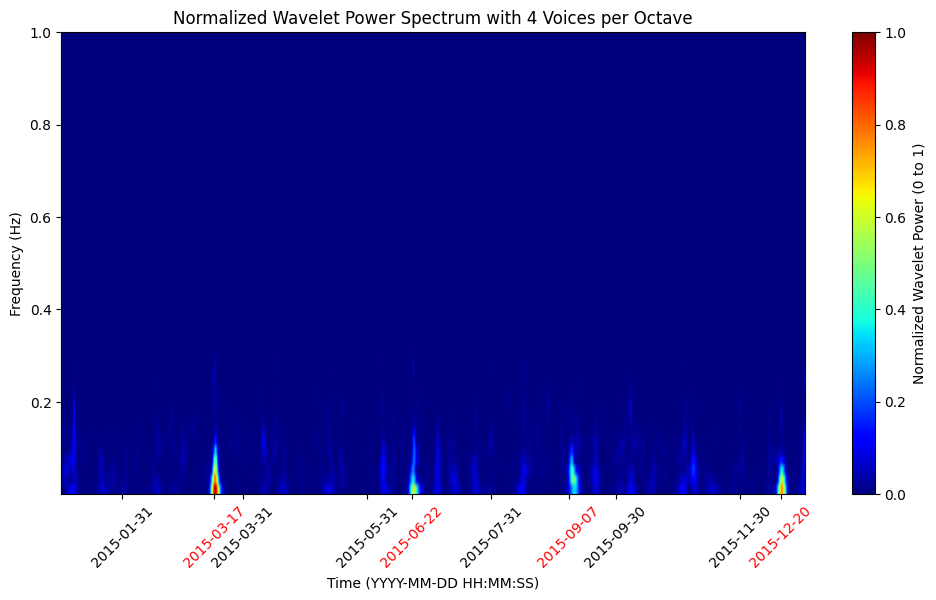

In [3]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd

# Load the geomagnetic data file
file_path = "KyotoSymhYear2015.dat"
data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=17)

# Rename columns for clarity
data.columns = ["Date", "Time", "DOY", "ASY-D", "ASY-H", "SYM-D", "SYM-H"]

# Combine "Date" and "Time" columns into a single datetime column
data["Timestamp"] = pd.to_datetime(data["Date"] + " " + data["Time"])

# Extract timestamps and geomagnetic index
timestamps = data["Timestamp"].values  # Extracted timestamps
geomagnetic_index = data["SYM-H"].values  # Geomagnetic index data

# Define wavelet parameters
wavelet = 'cmor1.5-1.0'  # Morlet wavelet with bandwidth=1.5, center frequency=1.0
min_scale = 1  # Smallest scale (highest frequency)
num_voices_per_octave = 4  # More voices = finer frequency resolution
num_octaves = 12  # Total number of octaves analyzed

# Compute scales: Logarithmic spacing with octave subdivision
scales = min_scale * 2 ** (np.arange(num_octaves * num_voices_per_octave) / num_voices_per_octave)

# Compute the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(geomagnetic_index, scales, wavelet, 1)

# ✅ Compute the power spectrum (square of absolute values)
power_spectrum = np.abs(coefficients) ** 2

# ✅ Normalize the power spectrum to [0,1]
power_min = np.min(power_spectrum)
power_max = np.max(power_spectrum)
normalized_power = (power_spectrum - power_min) / (power_max - power_min)

# ✅ Plot the Normalized Wavelet Power Spectrum with timestamps on the x-axis
plt.figure(figsize=(12, 6))
plt.imshow(normalized_power, aspect='auto', extent=[timestamps[0], timestamps[-1], frequencies[-1], frequencies[0]], cmap='jet')

plt.colorbar(label="Normalized Wavelet Power (0 to 1)")
plt.xlabel("Time (YYYY-MM-DD HH:MM:SS)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Normalized Wavelet Power Spectrum with {num_voices_per_octave} Voices per Octave")

# ✅ Automatically generate x-axis ticks every 2 months
default_ticks = pd.date_range(start=timestamps[0], end=timestamps[-1], freq='2ME')

# ✅ Manually highlight storm dates in red
storm_dates = ["2015-03-17", "2015-06-22", "2015-09-07", "2015-12-20"]  # Updated storm dates
storm_dates = pd.to_datetime(storm_dates)

# Merge default ticks with storm dates, keeping unique values
all_ticks = sorted(set(default_ticks).union(set(storm_dates)))

# ✅ Change color for storm dates on x-axis
tick_colors = ["red" if date in storm_dates else "black" for date in all_ticks]

# ✅ Apply x-axis labels with colors
plt.xticks(all_ticks, [date.strftime("%Y-%m-%d") for date in all_ticks], rotation=45)
for ticklabel, color in zip(plt.gca().get_xticklabels(), tick_colors):
    ticklabel.set_color(color)

plt.show()


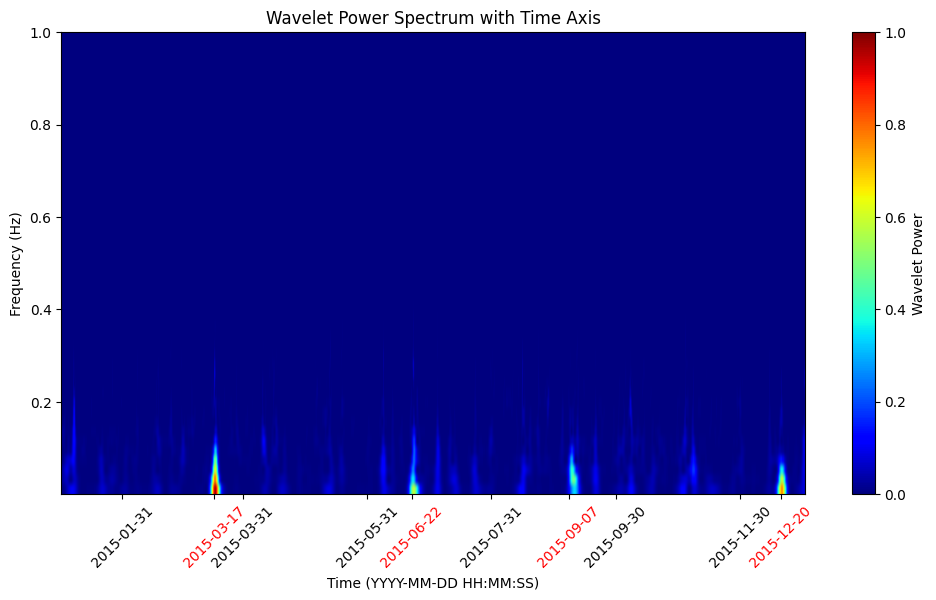

In [4]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd

# ✅ 1. Load the geomagnetic data
def load_geomagnetic_data(file_path):
    """Loads geomagnetic index data from a CSV file."""
    data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=17)
    
    # Rename columns
    data.columns = ["Date", "Time", "DOY", "ASY-D", "ASY-H", "SYM-D", "SYM-H"]

    # Combine "Date" and "Time" into a single datetime column
    data["Timestamp"] = pd.to_datetime(data["Date"] + " " + data["Time"])

    # Extract timestamps and geomagnetic index
    timestamps = data["Timestamp"].values  # Extracted timestamps
    geomagnetic_index = data["SYM-H"].values  # Geomagnetic index data

    return timestamps, geomagnetic_index

# ✅ 2. Compute Wavelet Transform
def compute_wavelet_transform(geomagnetic_index, num_octaves=12, num_voices_per_octave=4, wavelet_type='cmor1.5-1.0'):
    """Computes the Continuous Wavelet Transform (CWT) for the geomagnetic index data."""
    min_scale = 1  # Smallest scale (highest frequency)
    
    # Logarithmically spaced scales
    scales = min_scale * 2 ** (np.arange(num_octaves * num_voices_per_octave) / num_voices_per_octave)
    
    # Compute CWT
    coefficients, frequencies = pywt.cwt(geomagnetic_index, scales, wavelet_type, 1)
    
    return coefficients, frequencies

# ✅ 3. Normalize the Spectrogram (Scale between [0,1])
def normalize_spectrogram(power_spectrum):
    """Normalizes the power spectrum values to the range [0,1]."""
    norm_spectrum = (power_spectrum - np.min(power_spectrum)) / (np.max(power_spectrum) - np.min(power_spectrum))
    return norm_spectrum

# ✅ 4. Plot the Wavelet Power Spectrum
def plot_wavelet_spectrum(timestamps, frequencies, power_spectrum, storm_dates):
    """Plots the wavelet power spectrum with timestamps and highlights magnetic storm dates."""
    plt.figure(figsize=(12, 6))
    plt.imshow(power_spectrum, aspect='auto', extent=[timestamps[0], timestamps[-1], frequencies[-1], frequencies[0]], cmap='jet')
    
    plt.colorbar(label="Wavelet Power")
    plt.xlabel("Time (YYYY-MM-DD HH:MM:SS)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Wavelet Power Spectrum with Time Axis")

    # ✅ Automatically generate x-axis ticks every 2 months
    default_ticks = pd.date_range(start=timestamps[0], end=timestamps[-1], freq='2ME')

    # Convert storm dates to datetime
    storm_dates = pd.to_datetime(storm_dates)

    # Merge default ticks with storm dates, keeping unique values
    all_ticks = sorted(set(default_ticks).union(set(storm_dates)))

    # ✅ Change color for storm dates on x-axis
    tick_colors = ["red" if date in storm_dates else "black" for date in all_ticks]

    # ✅ Apply x-axis labels with colors
    plt.xticks(all_ticks, [date.strftime("%Y-%m-%d") for date in all_ticks], rotation=45)
    for ticklabel, color in zip(plt.gca().get_xticklabels(), tick_colors):
        ticklabel.set_color(color)

    plt.show()

# ✅ 5. Main Execution Flow
if __name__ == "__main__":
    file_path = "KyotoSymhYear2015.dat"  # Specify your data file

    # Load data
    timestamps, geomagnetic_index = load_geomagnetic_data(file_path)

    # Compute Wavelet Transform
    coefficients, frequencies = compute_wavelet_transform(geomagnetic_index)

    # Compute Power Spectrum
    power_spectrum = np.abs(coefficients) ** 2

    # Normalize Power Spectrum
    normalized_power_spectrum = normalize_spectrogram(power_spectrum)

    # Define storm dates
    storm_dates = ["2015-03-17", "2015-06-22", "2015-09-07", "2015-12-20"]

    # Plot Wavelet Spectrum
    plot_wavelet_spectrum(timestamps, frequencies, normalized_power_spectrum, storm_dates)


In [5]:
import numpy as np
import pywt
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize

def load_geomagnetic_data(file_path):
    """Loads geomagnetic data from a file."""
    data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=17)
    data.columns = ["Date", "Time", "DOY", "ASY-D", "ASY-H", "SYM-D", "SYM-H"]
    data["Timestamp"] = pd.to_datetime(data["Date"] + " " + data["Time"])
    return data["Timestamp"].values, data["SYM-H"].values

def compute_wavelet_transform(geomagnetic_index, num_octaves=12, num_voices_per_octave=4):
    """Computes the continuous wavelet transform of the geomagnetic index."""
    wavelet = 'cmor1.5-1.0'
    min_scale = 1
    scales = min_scale * 2 ** (np.arange(num_octaves * num_voices_per_octave) / num_voices_per_octave)
    coefficients, frequencies = pywt.cwt(geomagnetic_index, scales, wavelet, 1)
    return coefficients, frequencies

def normalize_spectrum(power_spectrum):
    """Normalizes the power spectrum between 0 and 1."""
    return (power_spectrum - np.min(power_spectrum)) / (np.max(power_spectrum) - np.min(power_spectrum))

def downsample_time_axis(power_spectrum, target_width):
    """Reduces the number of time points using averaging to match target width."""
    return resize(power_spectrum, (power_spectrum.shape[0], target_width), mode='reflect', anti_aliasing=True)

def reduce_frequencies(power_spectrum, frequencies, target_height=256):
    """Reduces the number of frequency bands while preserving key information."""
    power_threshold = np.mean(power_spectrum) * 0.01  # Threshold for nearly-zero power
    selected_indices = np.where(np.mean(power_spectrum, axis=1) > power_threshold)[0]
    reduced_power_spectrum = power_spectrum[selected_indices, :]
    reduced_frequencies = frequencies[selected_indices]
    
    if len(reduced_frequencies) > target_height:
        reduced_power_spectrum = resize(reduced_power_spectrum, (target_height, reduced_power_spectrum.shape[1]), mode='reflect', anti_aliasing=True)
        reduced_frequencies = np.linspace(reduced_frequencies[0], reduced_frequencies[-1], target_height)
    
    return reduced_power_spectrum, reduced_frequencies

def plot_wavelet_spectrum(timestamps, power_spectrum, frequencies):
    """Plots the wavelet spectrum with time labels."""
    plt.figure(figsize=(12, 6))
    plt.imshow(power_spectrum, aspect='auto', extent=[timestamps[0], timestamps[-1], frequencies[-1], frequencies[0]], cmap='jet')
    plt.colorbar(label="Normalized Wavelet Power")
    plt.xlabel("Time (YYYY-MM-DD HH:MM:SS)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Resized Wavelet Power Spectrum")
    plt.show()

# Usage example
file_path = "KyotoSymhYear2015.dat"
timestamps, geomagnetic_index = load_geomagnetic_data(file_path)
coefficients, frequencies = compute_wavelet_transform(geomagnetic_index)
power_spectrum = np.abs(coefficients) ** 2
normalized_spectrum = normalize_spectrum(power_spectrum)
resized_spectrum = downsample_time_axis(normalized_spectrum, target_width=512)
final_spectrum, final_frequencies = reduce_frequencies(resized_spectrum, frequencies)
plot_wavelet_spectrum(timestamps, final_spectrum, final_frequencies)


ModuleNotFoundError: No module named 'skimage'

In [6]:
!pip install scikit-image


   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.9 MB 3.6 MB/s eta 0:00:04
   ------ --------------------------------- 2.1/12.9 MB 3.9 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/12.9 MB 3.9 MB/s eta 0:00:03
   ---------- ----------------------------- 3.4/12.9 MB 3.6 MB/s eta 0:00:03
   ------------ --------------------------- 3.9/12.9 MB 3.3 MB/s eta 0:00:03
   ------------- -------------------------- 4.5/12.9 MB 3.2 MB/s eta 0:00:03
   --------------- ------------------------ 5.0/12.9 MB 3.2 MB/s eta 0:00:03
   ----------------- ---------------------- 5.8/12.9 MB 3.1 MB/s eta 0:00:03
   ------------------- -------------------- 6.3/12.9 MB 3.0 MB/s eta 0:00:03
   --------------------- ------------------ 6.8/12.9 MB 3.0 MB/s eta 0:00:03
   ---------------------- ----------------- 7.3/12.9 MB 3.0 MB/s eta 0:00:02
   ----------

In [7]:
!pip install scikit-imagep

ERROR: Could not find a version that satisfies the requirement scikit-imagep (from versions: none)
ERROR: No matching distribution found for scikit-imagep


In [8]:
!pip install scikit-image


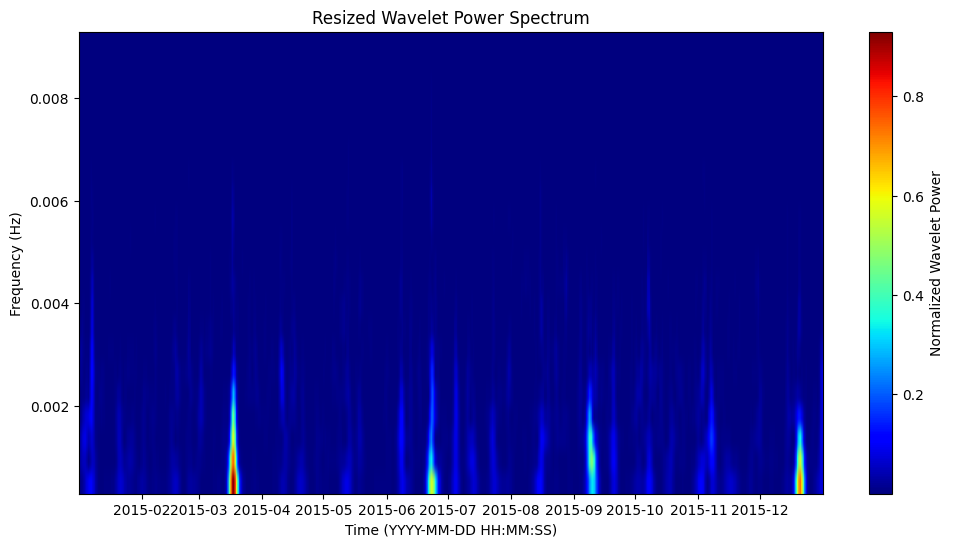

In [9]:
import numpy as np
import pywt
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize

def load_geomagnetic_data(file_path):
    """Loads geomagnetic data from a file."""
    data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=17)
    data.columns = ["Date", "Time", "DOY", "ASY-D", "ASY-H", "SYM-D", "SYM-H"]
    data["Timestamp"] = pd.to_datetime(data["Date"] + " " + data["Time"])
    return data["Timestamp"].values, data["SYM-H"].values

def compute_wavelet_transform(geomagnetic_index, num_octaves=12, num_voices_per_octave=4):
    """Computes the continuous wavelet transform of the geomagnetic index."""
    wavelet = 'cmor1.5-1.0'
    min_scale = 1
    scales = min_scale * 2 ** (np.arange(num_octaves * num_voices_per_octave) / num_voices_per_octave)
    coefficients, frequencies = pywt.cwt(geomagnetic_index, scales, wavelet, 1)
    return coefficients, frequencies

def normalize_spectrum(power_spectrum):
    """Normalizes the power spectrum between 0 and 1."""
    return (power_spectrum - np.min(power_spectrum)) / (np.max(power_spectrum) - np.min(power_spectrum))

def downsample_time_axis(power_spectrum, target_width):
    """Reduces the number of time points using averaging to match target width."""
    return resize(power_spectrum, (power_spectrum.shape[0], target_width), mode='reflect', anti_aliasing=True)

def reduce_frequencies(power_spectrum, frequencies, target_height=256):
    """Reduces the number of frequency bands while preserving key information."""
    power_threshold = np.mean(power_spectrum) * 0.01  # Threshold for nearly-zero power
    selected_indices = np.where(np.mean(power_spectrum, axis=1) > power_threshold)[0]
    reduced_power_spectrum = power_spectrum[selected_indices, :]
    reduced_frequencies = frequencies[selected_indices]
    
    if len(reduced_frequencies) > target_height:
        reduced_power_spectrum = resize(reduced_power_spectrum, (target_height, reduced_power_spectrum.shape[1]), mode='reflect', anti_aliasing=True)
        reduced_frequencies = np.linspace(reduced_frequencies[0], reduced_frequencies[-1], target_height)
    
    return reduced_power_spectrum, reduced_frequencies

def plot_wavelet_spectrum(timestamps, power_spectrum, frequencies):
    """Plots the wavelet spectrum with time labels."""
    plt.figure(figsize=(12, 6))
    plt.imshow(power_spectrum, aspect='auto', extent=[timestamps[0], timestamps[-1], frequencies[-1], frequencies[0]], cmap='jet')
    plt.colorbar(label="Normalized Wavelet Power")
    plt.xlabel("Time (YYYY-MM-DD HH:MM:SS)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Resized Wavelet Power Spectrum")
    plt.show()

# Usage example
file_path = "KyotoSymhYear2015.dat"
timestamps, geomagnetic_index = load_geomagnetic_data(file_path)
coefficients, frequencies = compute_wavelet_transform(geomagnetic_index)
power_spectrum = np.abs(coefficients) ** 2
normalized_spectrum = normalize_spectrum(power_spectrum)
resized_spectrum = downsample_time_axis(normalized_spectrum, target_width=512)
final_spectrum, final_frequencies = reduce_frequencies(resized_spectrum, frequencies)
plot_wavelet_spectrum(timestamps, final_spectrum, final_frequencies)
